In [505]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [394]:
df_2017 = pd.read_csv('Parking_Violations_Issued_-_Fiscal_Year_2017.csv', low_memory = False)


In [395]:
# pd.set_option("display.max_columns", None)
# pd.set_option("display.max_rows", None)

In [396]:
df_2017.shape

(10803028, 43)

In [397]:
df_2017.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,Street Code2,Street Code3,Vehicle Expiration Date,Violation Location,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Command,Issuer Squad,Violation Time,Time First Observed,Violation County,Violation In Front Of Or Opposite,House Number,Street Name,Intersecting Street,Date First Observed,Law Section,Sub Division,Violation Legal Code,Days Parking In Effect,From Hours In Effect,To Hours In Effect,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,5092469481,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0143A,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
1,5092451658,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0400P,NaN,BX,NaN,NaN,ALLERTON AVE (W/B) @,BARNES AVE,0,1111,D,T,NaN,NaN,NaN,GY,NaN,2001,NaN,0,NaN,FAILURE TO STOP AT RED LIGHT,NaN,NaN,NaN
2,4006265037,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,0,0,0,NaN,0,0,0,NaN,NaN,0233P,NaN,BX,NaN,NaN,SB WEBSTER AVE @ E 1,94TH ST,0,1111,C,T,NaN,NaN,NaN,BK,NaN,2004,NaN,0,NaN,BUS LANE VIOLATION,NaN,NaN,NaN
3,8478629828,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,10610,34330,34350,20180630,14.0,14,14,359594,T102,J,1120A,NaN,NY,O,330,7th Ave,NaN,0,408,l2,NaN,Y,0700A,0700P,WH,NaN,2007,NaN,0,04,47-Double PKG-Midtown,NaN,NaN,NaN
4,7868300310,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,10510,34310,34330,20170228,13.0,13,13,364832,T102,M,0555P,NaN,NY,F,799,6th Ave,NaN,0,408,h1,NaN,Y,0700A,0700P,WHITE,NaN,2007,NaN,0,31 6,69-Failure to Disp Muni Recpt,NaN,NaN,NaN


First we drop the attributes we don't want. They are all either superfluous, unnecessary to our analysis, or we are unable to find the codes anywhere in order to understand the values 

In [399]:
# df_2017.drop('Summons Number', axis=1, inplace=True)
# df_2017.drop('Street Code1', axis=1, inplace=True)
# df_2017.drop('Street Code2', axis=1, inplace=True)
# df_2017.drop('Street Code3', axis=1, inplace=True)
# df_2017.drop('Violation Location', axis=1, inplace=True)
# df_2017.drop('Issuer Command', axis=1, inplace=True)
# df_2017.drop('Time First Observed', axis=1, inplace=True)
# df_2017.drop('Violation In Front Of Or Opposite', axis=1, inplace=True)
# df_2017.drop('House Number', axis=1, inplace=True)
# df_2017.drop('Intersecting Street', axis=1, inplace=True)
# df_2017.drop('Date First Observed', axis=1, inplace=True)
# df_2017.drop('Law Section', axis=1, inplace=True)
# df_2017.drop('Sub Division', axis=1, inplace=True)
# df_2017.drop('Violation Legal Code', axis=1, inplace=True)  
# df_2017.drop('Days Parking In Effect    ', axis=1, inplace=True)
# df_2017.drop('From Hours In Effect', axis=1, inplace=True) 
# df_2017.drop('To Hours In Effect', axis=1, inplace=True) 
# df_2017.drop('Unregistered Vehicle?', axis=1, inplace=True) 
# df_2017.drop('No Standing or Stopping Violation', axis=1, inplace=True)
# df_2017.drop('Hydrant Violation', axis=1, inplace=True)
# df_2017.drop('Double Parking Violation', axis=1, inplace=True)
# df_2017.drop('Feet From Curb', axis=1, inplace=True)
# df_2017.drop('Violation Post Code', axis=1, inplace=True)

In [400]:
df_2017.head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Vehicle Expiration Date,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Squad,Violation Time,Violation County,Street Name,Vehicle Color,Vehicle Year,Meter Number,Violation Description
0,GZH7067,NY,PAS,07/10/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0143A,BX,ALLERTON AVE (W/B) @,GY,2001,NaN,FAILURE TO STOP AT RED LIGHT
1,GZH7067,NY,PAS,07/08/2016,7,SUBN,TOYOT,V,0,0,0,0,NaN,0400P,BX,ALLERTON AVE (W/B) @,GY,2001,NaN,FAILURE TO STOP AT RED LIGHT
2,FZX9232,NY,PAS,08/23/2016,5,SUBN,FORD,V,0,0,0,0,NaN,0233P,BX,SB WEBSTER AVE @ E 1,BK,2004,NaN,BUS LANE VIOLATION
3,66623ME,NY,COM,06/14/2017,47,REFG,MITSU,T,20180630,14,14,359594,J,1120A,NY,7th Ave,WH,2007,NaN,47-Double PKG-Midtown
4,37033JV,NY,COM,11/21/2016,69,DELV,INTER,T,20170228,13,13,364832,M,0555P,NY,6th Ave,WHITE,2007,NaN,69-Failure to Disp Muni Recpt


In [638]:
# dataframe[dataframe['series'] == 'value']
df_2017[df_2017['Vehicle Make'] == 'TESLA'].head()

,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Vehicle Expiration Date,Violation Precinct,Issuer Precinct,Issuer Code,Issuer Squad,Violation Time,Violation County,Street Name,Vehicle Color,Vehicle Year,Meter Number,Violation Description,Issue Month
1046,HFA4346,NY,PAS,2017-01-24,31,4DSD,TESLA,T,20180327,18,18,345323,G,0318P,NY,W 46th St,BL,2016,NaN,31-No Stand (Com. Mtr. Zone),01
1863,FPP8108,NY,PAS,2016-10-25,38,SUBN,TESLA,T,20170804,19,19,363966,Q,0327P,NY,Lexington Ave,BL,2016,NaN,38-Failure to Display Muni Rec,10
7161,HDX5802,NY,PAS,2017-01-04,71,4DSD,TESLA,T,20171217,94,94,363934,S,0431P,K,N 8th St,GY,2015,NaN,71A-Insp Sticker Expired (NYS),01
7385,HLX4564,NY,PAS,2017-03-02,36,4DSD,TESLA,V,0,0,0,0,NaN,1048A,BK,NB OCEAN PKWY @ BEVE,WH,2016,NaN,PHTO SCHOOL ZN SPEED VIOLATION,03
7607,HDX5821,NY,PAS,2017-04-06,71,4DSD,TESLA,T,20180112,6,6,353469,M,1032A,NY,W Broadway,WH,2015,NaN,71A-Insp Sticker Expired (NYS),04


Now were going to clean up the issue dates to make sure all of the dates are in 2016 or 2017

First we. convert "Issue Date" to time date format

In [401]:
df_2017['Issue Date'] = pd.to_datetime(df_2017['Issue Date'], infer_datetime_format = True)

First we're going to drop any dates that are not in 2016, 2017

In [402]:
df_2017.drop(df_2017.loc[(df_2017['Issue Date'] < '2016-01-01')].index, inplace =True)
df_2017.drop(df_2017.loc[(df_2017['Issue Date'] >= '2018-01-01')].index, inplace =True)

Next were going to create a new column (attribute) for the month the ticket was given in and call it "Issue Month"

In [403]:
df_2017['Issue Month'] = df_2017['Issue Date'].dt.strftime('%m')

Next were going to aggregate all the tickets issued per month into a new dataframe 

In [404]:
IssueMonths = df_2017['Issue Month'].value_counts(ascending = False)
IssueMonths = IssueMonths.to_frame()
IssueMonths.reset_index(inplace = True)

In [405]:
IssueMonths.sort_values('index')

,index,Issue Month
7,01,878381
8,02,827265
3,03,965001
6,04,888656
1,05,1026208
0,06,1103121
11,07,700845
9,08,801567
4,09,960904
2,10,969604


Rename the columns

In [406]:
IssueMonths.rename(columns = {'index':'Month', 'Issue Month':'Num_Tickets'}, inplace = True)

In [407]:
IssueMonths = IssueMonths.sort_values('Month')

<AxesSubplot:xlabel='Month', ylabel='Num_Tickets'>

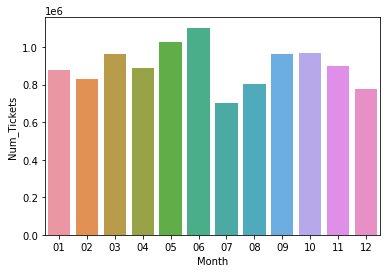

In [408]:
sns.barplot(x='Month', y='Num_Tickets', data = IssueMonths)

In [409]:
make_violation = df_2017.groupby('Vehicle Make')['Violation Description'].value_counts().sort_values(ascending = False)

In [410]:
make_violation = make_violation.to_frame()

In [639]:
make_violation.head()

Num_Tickets
Vehicle Make Violation Description                      
10USA        FAILURE TO STOP AT RED LIGHT              2
201          FAILURE TO STOP AT RED LIGHT              1
AAA          PHTO SCHOOL ZN SPEED VIOLATION            1
AC           FAILURE TO STOP AT RED LIGHT              1
             PHTO SCHOOL ZN SPEED VIOLATION            1

In [412]:
make_violation.rename(columns = {'Violation Description': 'Num_Tickets'}, inplace = True)

In [413]:
make_violation.reset_index(inplace= True)

In [414]:
make_violation = make_violation.groupby([ 'Vehicle Make', 'Violation Description'])['Num_Tickets'].first()

In [415]:
make_violation = make_violation.to_frame()

In [640]:
make_violation.sort_values(['Violation Description', 'Num_Tickets'], ascending = [True , False]).head()

,,Num_Tickets
Vehicle Make,Violation Description,
FORD,01-No Intercity Pmt Displ,245
NS/OT,01-No Intercity Pmt Displ,142
CHEVR,01-No Intercity Pmt Displ,34
FRUEH,01-No Intercity Pmt Displ,28
INTER,01-No Intercity Pmt Displ,21


In [641]:
make_violation.groupby(['Violation Description']).count()['Num_Tickets'].sort_values(ascending=False).reset_index().head()

,Violation Description,Num_Tickets
0,PHTO SCHOOL ZN SPEED VIOLATION,677
1,FAILURE TO STOP AT RED LIGHT,520
2,BUS LANE VIOLATION,313
3,14-No Standing,219
4,21-No Parking (street clean),209


In [643]:
df_2017.groupby(['Violation Description']).count()['Summons Number'].sort_values(ascending=False)

KeyError: 'Summons Number'

In [366]:
df_2017.groupby(['Violation Description']).count()['Num_Tickets'].sort_values(ascending=False).reset_index()

In [646]:
make_violation.sort_values(['Vehicle Make', 'Num_Tickets'], ascending = [True, False]).head()

Num_Tickets
Vehicle Make Violation Description                      
10USA        FAILURE TO STOP AT RED LIGHT              2
201          FAILURE TO STOP AT RED LIGHT              1
AAA          PHTO SCHOOL ZN SPEED VIOLATION            1
AC           FAILURE TO STOP AT RED LIGHT              1
             PHTO SCHOOL ZN SPEED VIOLATION            1

In [645]:
make_violation_short.head()

Num_Tickets
Vehicle Make Violation Description                    
ACURA        09-Blocking the Box                   939
             14-No Standing                       9852
             16A-No Std (Com Veh) Non-COM         1797
             17-No Stand (exc auth veh)           1134
             19-No Stand (bus stop)               2849

In [647]:
make_violation.groupby(['Violation Description', 'Vehicle Make']).max().sort_values(['Violation Description', 'Num_Tickets'], ascending = [True, False]).head()

Num_Tickets
Violation Description     Vehicle Make             
01-No Intercity Pmt Displ FORD                  245
                          NS/OT                 142
                          CHEVR                  34
                          FRUEH                  28
                          INTER                  21

In [648]:
make_violation.groupby('Vehicle Make')['Num_Tickets'].sum().sort_values(ascending = False).head()

Vehicle Make
FORD     1158646
TOYOT    1094379
HONDA     970682
NISSA     827593
CHEVR     651712
Name: Num_Tickets, dtype: int64

In [445]:
vehicle_make_total_tickets = dict(make_violation.groupby('Vehicle Make')['Num_Tickets'].sum().sort_values(ascending = False))

In [446]:
vmake_tickets_per_violation = make_violation.groupby(['Violation Description', 'Vehicle Make']).max().sort_values(['Violation Description', 'Num_Tickets'], ascending = [True, False])

In [447]:
vmake_tickets_per_violation = vmake_tickets_per_violation.reset_index()



In [448]:
vmake_tickets_per_violation['% of Make'] = 0
vmake_tickets_per_violation['total tickets for make'] = "NaN"

In [449]:
vmake_tickets_per_violation.head()

,Violation Description,Vehicle Make,Num_Tickets,% of Make,total tickets for make
0,01-No Intercity Pmt Displ,FORD,245,0,NaN
1,01-No Intercity Pmt Displ,NS/OT,142,0,NaN
2,01-No Intercity Pmt Displ,CHEVR,34,0,NaN
3,01-No Intercity Pmt Displ,FRUEH,28,0,NaN
4,01-No Intercity Pmt Displ,INTER,21,0,NaN


In [649]:
vmake_tickets_per_violation.head()

,Violation Description,Vehicle Make,Num_Tickets,% of Make,total tickets for make,Total Tickets for Violation,% of Violation
0,01-No Intercity Pmt Displ,FORD,245,0.021145,1158646,524,46.755725
1,01-No Intercity Pmt Displ,NS/OT,142,0.132354,107288,524,27.099237
2,01-No Intercity Pmt Displ,CHEVR,34,0.005217,651712,524,6.488550
3,01-No Intercity Pmt Displ,FRUEH,28,0.007571,369830,524,5.343511
4,01-No Intercity Pmt Displ,INTER,21,0.009012,233019,524,4.007634


In [451]:
for index, row in vmake_tickets_per_violation.iterrows():
    make = row['Vehicle Make']
    total = vehicle_make_total_tickets[make] 
    vmake_tickets_per_violation.loc[index , 'total tickets for make']  = total


In [452]:
vmake_tickets_per_violation['% of Make'] = (vmake_tickets_per_violation['Num_Tickets'] / vmake_tickets_per_violation['total tickets for make'] *100)

In [453]:
vmake_tickets_per_violation.head()
vmake_tickets_per_violation.columns

Index(['Violation Description', 'Vehicle Make', 'Num_Tickets', '% of Make',
       'total tickets for make'],
      dtype='object')

In [650]:
vmake_tickets_per_violation.groupby(['Total Tickets for Violation', '% of Violation']).max().sort_values(['Total Tickets for Violation', '% of Violation'], ascending = [False, False]).head()

Violation Description  \
Total Tickets for Violation % of Violation                                   
1400614                     14.227332       PHTO SCHOOL ZN SPEED VIOLATION   
                            12.163523       PHTO SCHOOL ZN SPEED VIOLATION   
                            11.794256       PHTO SCHOOL ZN SPEED VIOLATION   
                            9.200893        PHTO SCHOOL ZN SPEED VIOLATION   
                            5.688362        PHTO SCHOOL ZN SPEED VIOLATION   

                                           Vehicle Make  Num_Tickets  \
Total Tickets for Violation % of Violation                             
1400614                     14.227332             TOYOT       199270   
                            12.163523             HONDA       170364   
                            11.794256             NISSA       165192   
                            9.200893               FORD       128869   
                            5.688362              CHEVR        79672   

                                            % of Make  total tickets for make  
Total Tickets for Violation % of Violation                                     
1400614                     14.227332       18.208500                 1094379  
                            12.163523       17.550959                  970682  
                            11.794256       19.960536                  827593  
                            9.200893        11.122379                 1158646  
                            5.688362        12.225032                  651712

In [651]:
df_2017['Vehicle Make'].value_counts().head()

FORD     1280682
TOYOT    1211159
HONDA    1078965
NISSA     918380
CHEVR     714507
Name: Vehicle Make, dtype: int64

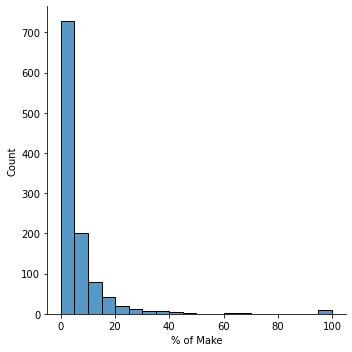

In [428]:
sns.displot(vmake_tickets_per_violation['% of Make'], bins = 20)

In [652]:
vmake_tickets_per_violation.loc[vmake_tickets_per_violation['% of Make'] > 20].head()

,Violation Description,Vehicle Make,Num_Tickets,% of Make,total tickets for make,Total Tickets for Violation,% of Violation
266,09-Blocking the Box,CRAN,1,100.0,1,52731,0.001896
267,09-Blocking the Box,FE/C,1,100.0,1,52731,0.001896
381,10-No Stopping,AXAT,1,33.333333,3,44677,0.002238
585,14-No Standing,FRUEH,92522,25.01744,369830,811080,11.407259
588,14-No Standing,INTER,51140,21.946708,233019,811080,6.305173


In [430]:
vmake_tickets_per_violation.columns


Index(['Violation Description', 'Vehicle Make', 'Num_Tickets', '% of Make',
       'total tickets for make'],
      dtype='object')

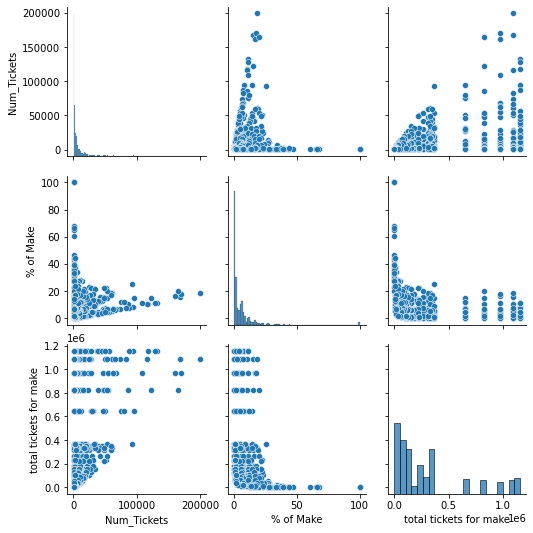

In [431]:
sns.pairplot(vmake_tickets_per_violation)

In [460]:
vmake_tickets_per_violation['Total Tickets for Violation'] = 0
vmake_tickets_per_violation['% of Violation'] = 0

In [653]:
vmake_tickets_per_violation[['Violation Description', 'Vehicle Make', 'Num_Tickets', '% of Make', '% of Violation', 'Total Tickets for Violation', 'total tickets for make']].head()

,Violation Description,Vehicle Make,Num_Tickets,% of Make,% of Violation,Total Tickets for Violation,total tickets for make
0,01-No Intercity Pmt Displ,FORD,245,0.021145,46.755725,524,1158646
1,01-No Intercity Pmt Displ,NS/OT,142,0.132354,27.099237,524,107288
2,01-No Intercity Pmt Displ,CHEVR,34,0.005217,6.488550,524,651712
3,01-No Intercity Pmt Displ,FRUEH,28,0.007571,5.343511,524,369830
4,01-No Intercity Pmt Displ,INTER,21,0.009012,4.007634,524,233019


In [462]:
for index, row in vmake_tickets_per_violation.iterrows():
    viol = row['Violation Description']
    total = total_tickets_violation[viol] 
    vmake_tickets_per_violation.loc[index , 'Total Tickets for Violation']  = total

In [463]:
vmake_tickets_per_violation['% of Violation'] = (vmake_tickets_per_violation['Num_Tickets'] / vmake_tickets_per_violation['Total Tickets for Violation'] *100)

In [466]:
vmake_tickets_per_violation.columns

Index(['Violation Description', 'Vehicle Make', 'Num_Tickets', '% of Make',
       'total tickets for make', 'Total Tickets for Violation',
       '% of Violation'],
      dtype='object')

In [654]:
vmake_tickets_per_violation.groupby(['Violation Description', '% of Make']).max().sort_values(['Violation Description', '% of Make'], ascending = [True, False]).head()

Vehicle Make  Num_Tickets  \
Violation Description     % of Make                             
01-No Intercity Pmt Displ 0.358637         THOMA            6   
                          0.183486          STAR            1   
                          0.132354         NS/OT          142   
                          0.131096         VANHO            5   
                          0.092635           MCI            2   

                                     total tickets for make  \
Violation Description     % of Make                           
01-No Intercity Pmt Displ 0.358637                     1673   
                          0.183486                      545   
                          0.132354                   107288   
                          0.131096                     3814   
                          0.092635                     2159   

                                     Total Tickets for Violation  \
Violation Description     % of Make                                
01-No Intercity Pmt Displ 0.358637                           524   
                          0.183486                           524   
                          0.132354                           524   
                          0.131096                           524   
                          0.092635                           524   

                                     % of Violation  
Violation Description     % of Make                  
01-No Intercity Pmt Displ 0.358637         1.145038  
                          0.183486         0.190840  
                          0.132354        27.099237  
                          0.131096         0.954198  
                          0.092635         0.381679

[Text(0, 0, '09-Blocking the Box'),
 Text(1, 0, '13-No Stand (taxi stand)'),
 Text(2, 0, '23-No Parking (taxi stand)'),
 Text(3, 0, '28-O/T STD,DPL/Con,30 Mn,D Dec'),
 Text(4, 0, '32A Overtime PKG-Broken Meter'),
 Text(5, 0, '39-Overtime PKG-Time Limt Post'),
 Text(6, 0, '46A-Double Parking (Non-COM)'),
 Text(7, 0, '52-Intersection'),
 Text(8, 0, '55-Tunnel/Elevated Roadway'),
 Text(9, 0, '56-Divided Highway'),
 Text(10, 0, '65-O/T STD,Dpl/Con,30 Mn,D/S'),
 Text(11, 0, '80-Missing Equipment (specify)'),
 Text(12, 0, '96-Railroad Crossing'),
 Text(13, 0, '98-Obstructing Driveway'),
 Text(14, 0, 'BUS LANE VIOLATION'),
 Text(15, 0, 'FAILURE TO STOP AT RED LIGHT')]

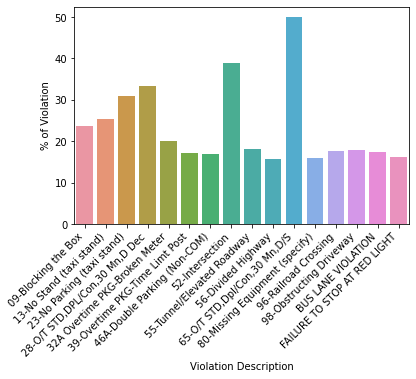

In [555]:
toyota_tics = (vmake_tickets_per_violation[vmake_tickets_per_violation['Vehicle Make'] == 'TOYOT'].reset_index())
del toyota_tics['index']
toyota_tics_short = toyota_tics[toyota_tics['% of Violation']>15]
toyota_bar=sns.barplot(x='Violation Description', y='% of Violation', data = toyota_tics_short)
sns.barplot(x='Violation Description', y='% of Violation', data = toyota_tics_short).set_xticklabels(toyota_bar.get_xticklabels(), rotation=45, horizontalalignment='right')

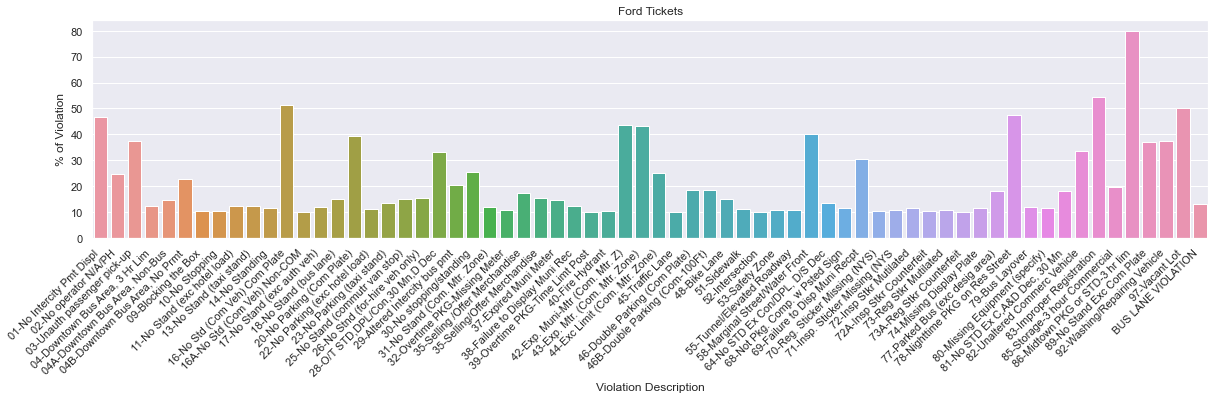

In [616]:
ford_tics = (vmake_tickets_per_violation[vmake_tickets_per_violation['Vehicle Make'] == 'FORD'].reset_index())
del ford_tics['index']
ford_tics_short =  ford_tics[ford_tics['% of Violation']>10]
ford_bar=sns.barplot(x='Violation Description', y='% of Violation', data = ford_tics_short)
sns.set(rc={"figure.figsize":(20, 4)})
ford_bar.set_title('Ford Tickets' )
ford_bar = sns.barplot(x='Violation Description', y='% of Violation', data = ford_tics_short).set_xticklabels(ford_bar.get_xticklabels(), rotation=45, horizontalalignment='right')


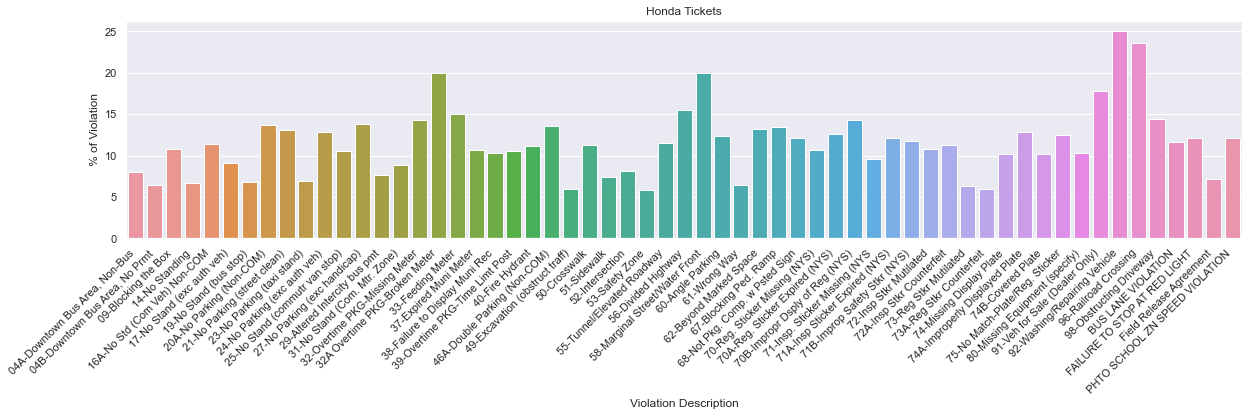

In [607]:
honda_tics = (vmake_tickets_per_violation[vmake_tickets_per_violation['Vehicle Make'] == 'HONDA'].reset_index())
honda_tics_short =  honda_tics[honda_tics['% of Violation']>5]
honda_bar=sns.barplot(x='Violation Description', y='% of Violation', data = honda_tics_short)
honda_bar.set_title('Honda Tickets' )
sns.barplot(x='Violation Description', y='% of Violation', data = honda_tics_short).set_xticklabels(honda_bar.get_xticklabels(), rotation=45, horizontalalignment='right');

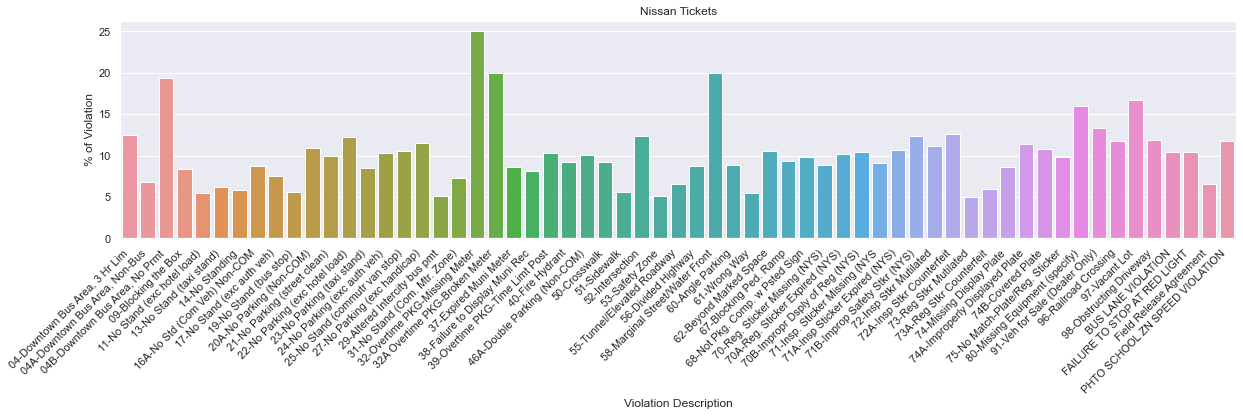

In [611]:
nissan_tics = (vmake_tickets_per_violation[vmake_tickets_per_violation['Vehicle Make'] == 'NISSA'].reset_index())
nissan_tics_short =  nissan_tics[nissan_tics['% of Violation']>5]
nissan_bar=sns.barplot(x='Violation Description', y='% of Violation', data = nissan_tics_short)
nissan_bar.set_title('Nissan Tickets' )
sns.barplot(x='Violation Description', y='% of Violation', data = nissan_tics_short).set_xticklabels(nissan_bar.get_xticklabels(), rotation=45, horizontalalignment='right');

In [538]:
df_2017['Vehicle Make'].value_counts()

FORD     1280682
TOYOT    1211159
HONDA    1078965
NISSA     918380
CHEVR     714507
FRUEH     429004
ME/BE     388967
BMW       374845
DODGE     372021
JEEP      348072
HYUND     296995
GMC       255039
LEXUS     245858
INTER     243732
ACURA     200109
CHRYS     177190
VOLKS     176518
INFIN     175061
SUBAR     140735
AUDI      135706
ISUZU     121833
KIA       108953
MAZDA     107781
NS/OT     107291
MITSU      99881
LINCO      95743
CADIL      85847
VOLVO      78159
ROVER      70064
MERCU      67015
HIN        62783
HINO       49220
KENWO      44437
WORKH      43637
BUICK      39167
PETER      33523
MINI       26032
MACK       24430
PORSC      24416
SMART      23504
PONTI      20456
SATUR      19393
JAGUA      13983
FIAT       13601
UD         12145
SUZUK      10260
SAAB       10091
MI/F        7948
UTILI       6149
WORK        6027
SCION       5524
VANHO       5466
VESPA       5187
OLDSM       5182
STERL       5179
UTIL        4833
MASSA       4813
HUMME       4114
KAWAS       40

In [637]:
df_2017['Violation Description'].value_counts()

PHTO SCHOOL ZN SPEED VIOLATION    1400614
21-No Parking (street clean)      1230545
38-Failure to Display Muni Rec    1056018
14-No Standing                     811080
37-Expired Muni Meter              593902
FAILURE TO STOP AT RED LIGHT       516388
20A-No Parking (Non-COM)           495591
71A-Insp Sticker Expired (NYS)     454867
40-Fire Hydrant                    422674
19-No Stand (bus stop)             228931
70A-Reg. Sticker Expired (NYS)     221522
46B-Double Parking (Com-100Ft)     209220
69-Failure to Disp Muni Recpt      183287
46A-Double Parking (Non-COM)       166830
BUS LANE VIOLATION                 145642
31-No Stand (Com. Mtr. Zone)       144988
47-Double PKG-Midtown              108759
16A-No Std (Com Veh) Non-COM        84527
48-Bike Lane                        75237
16-No Std (Com Veh) Com Plate       71417
50-Crosswalk                        70950
84-Platform lifts in low posit      70635
24-No Parking (exc auth veh)        65382
42-Exp. Muni-Mtr (Com. Mtr. Z)    

In [571]:
vmake_tickets_per_violation_short

,Violation Description,Vehicle Make,Num_Tickets,% of Make,total tickets for make,Total Tickets for Violation,% of Violation
584,14-No Standing,FORD,94362,8.144161,1158646,811080,11.634117
585,14-No Standing,FRUEH,92522,25.01744,369830,811080,11.407259
586,14-No Standing,TOYOT,61333,5.604366,1094379,811080,7.561893
587,14-No Standing,HONDA,54363,5.600495,970682,811080,6.702545
588,14-No Standing,INTER,51140,21.946708,233019,811080,6.305173
589,14-No Standing,CHEVR,50004,7.672714,651712,811080,6.165113
590,14-No Standing,NISSA,47222,5.705945,827593,811080,5.822114
591,14-No Standing,DODGE,29782,8.86691,335878,811080,3.671894
592,14-No Standing,GMC,25490,11.225069,227081,811080,3.142723
593,14-No Standing,ME/BE,24932,7.027731,354766,811080,3.073926


In [617]:
vmake_tickets_per_violation.groupby()

,Violation Description,Vehicle Make,Num_Tickets,% of Make,total tickets for make,Total Tickets for Violation,% of Violation
0,01-No Intercity Pmt Displ,FORD,245,0.021145,1158646,524,46.755725
1,01-No Intercity Pmt Displ,NS/OT,142,0.132354,107288,524,27.099237
2,01-No Intercity Pmt Displ,CHEVR,34,0.005217,651712,524,6.488550
3,01-No Intercity Pmt Displ,FRUEH,28,0.007571,369830,524,5.343511
4,01-No Intercity Pmt Displ,INTER,21,0.009012,233019,524,4.007634


In [630]:
top_school_photo = vmake_tickets_per_violation[(vmake_tickets_per_violation['% of Violation']>1) & (vmake_tickets_per_violation['Total Tickets for Violation'] > 100000)& (vmake_tickets_per_violation['Violation Description'] == 'PHTO SCHOOL ZN SPEED VIOLATION')& (vmake_tickets_per_violation['Num_Tickets'] > 10000)]

In [631]:
top_school_photo

,Violation Description,Vehicle Make,Num_Tickets,% of Make,total tickets for make,Total Tickets for Violation,% of Violation
8026,PHTO SCHOOL ZN SPEED VIOLATION,TOYOT,199270,18.2085,1094379,1400614,14.227332
8027,PHTO SCHOOL ZN SPEED VIOLATION,HONDA,170364,17.550959,970682,1400614,12.163523
8028,PHTO SCHOOL ZN SPEED VIOLATION,NISSA,165192,19.960536,827593,1400614,11.794256
8029,PHTO SCHOOL ZN SPEED VIOLATION,FORD,128869,11.122379,1158646,1400614,9.200893
8030,PHTO SCHOOL ZN SPEED VIOLATION,CHEVR,79672,12.225032,651712,1400614,5.688362
8031,PHTO SCHOOL ZN SPEED VIOLATION,BMW,60645,18.039389,336181,1400614,4.329887
8032,PHTO SCHOOL ZN SPEED VIOLATION,JEEP,59295,18.590455,318954,1400614,4.233500
8033,PHTO SCHOOL ZN SPEED VIOLATION,ME/BE,58781,16.56895,354766,1400614,4.196802
8034,PHTO SCHOOL ZN SPEED VIOLATION,HYUND,53119,19.643075,270421,1400614,3.792551
8035,PHTO SCHOOL ZN SPEED VIOLATION,DODGE,48974,14.580889,335878,1400614,3.496609


Text(0.5, 1.0, 'Speeding in School Zone - Top Violators')

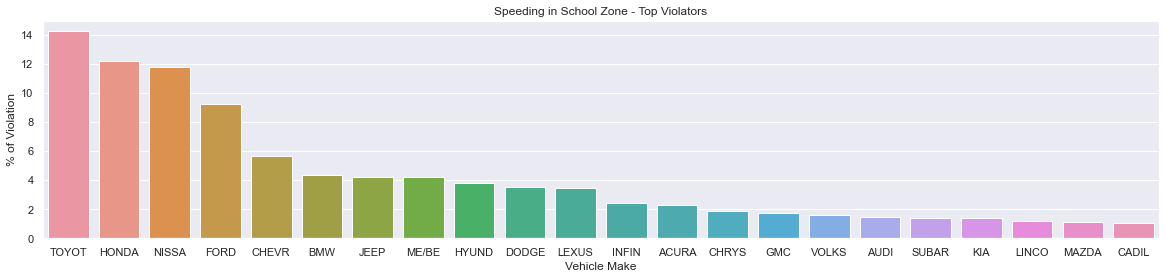

In [634]:
photo_school_bar=sns.barplot(x='Vehicle Make', y='% of Violation', data = top_school_photo)
photo_school_bar.set_title('Speeding in School Zone - Top Violators' )


Text(0.5, 1.0, "Speeding in School Zone - Percentage of Make's Total Tickets")

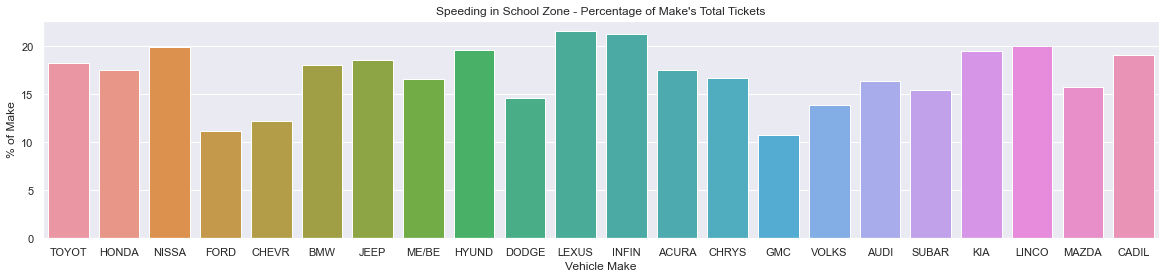

In [635]:
photo_school_bar_permake=sns.barplot(x='Vehicle Make', y='% of Make', data = top_school_photo)
photo_school_bar_permake.set_title("Speeding in School Zone - Percentage of Make's Total Tickets"  )

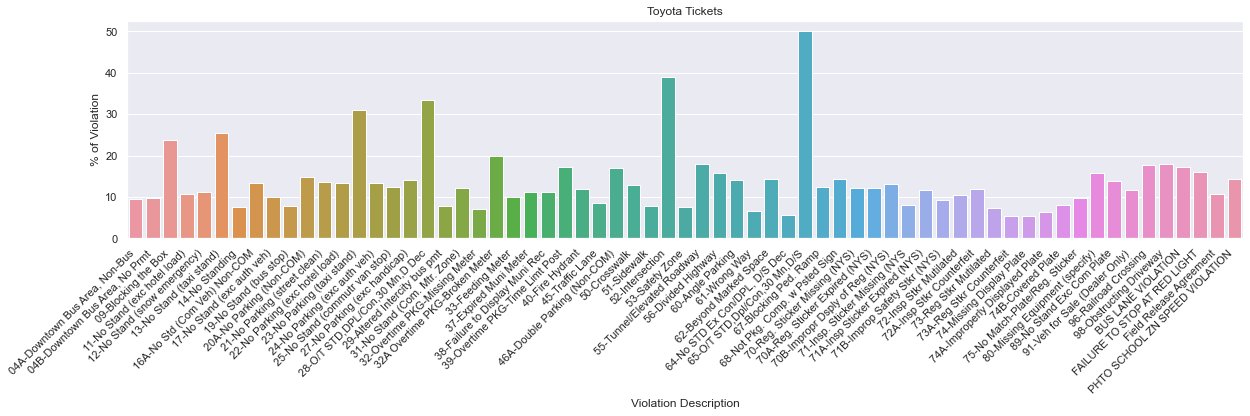

In [636]:
toyota_tics = (vmake_tickets_per_violation[vmake_tickets_per_violation['Vehicle Make'] == 'TOYOT'].reset_index())
toyota_tics_short =  toyota_tics[toyota_tics['% of Violation']>5]
toyota_bar=sns.barplot(x='Violation Description', y='% of Violation', data = toyota_tics_short)
toyota_bar.set_title('Toyota Tickets' )
sns.barplot(x='Violation Description', y='% of Violation', data = toyota_tics_short).set_xticklabels(toyota_bar.get_xticklabels(), rotation=45, horizontalalignment='right');